#importing libraries and dependencies

In [1]:
import tensorflow as tf
print(tf.__version__)
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

from google.colab.patches import cv2_imshow as show
from keras import Model, models, layers, metrics
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from sklearn.utils import shuffle
from sklearn import metrics

2.12.0


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/DissertationCNNModel/Data')

In [4]:
TRAIN_DATA_DIR = '/content/drive/MyDrive/DissertationCNNModel/Data/train'
TEST_DATA_DIR = '/content/drive/MyDrive/DissertationCNNModel/Data/test'

In [5]:
CATEGORIES = ["freshapples", "rottenapples"]

#loading the images into training data

In [11]:
IMG_SIZE = 450

In [7]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    counter = 0
    path = os.path.join(TRAIN_DATA_DIR, category)  # path to training data, fresh and rotten apples
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_data.append([new_array, class_num])
      counter+=1
      if(counter == 500): break

create_training_data()

In [ ]:
x_train = []
y_train = []

In [ ]:
for features, label in training_data:
  x_train.append(features)
  y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train.shape
x_train = x_train / 255.0

In [ ]:
x_train_shuffled, y_train_shuffled = shuffle(x_train, y_train, random_state = 0)

#construct the model architecture

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [ ]:
model.compile(
  optimizer='adam',
  loss= 'binary_crossentropy', #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
trained_model = model.fit(x_train_shuffled, y_train_shuffled, batch_size = 16, epochs = 8, validation_split = 0.1 ) # batch_size = 32, epochs = 10, validation_split = 0.2, validation_data = (x_test, y_test)

Epoch 1/10
57/57 [==============================] - 123s 2s/step - loss: 2.0970 - accuracy: 0.7144 - val_loss: 0.3658 - val_accuracy: 0.8300
Epoch 2/10
57/57 [==============================] - 113s 2s/step - loss: 0.3230 - accuracy: 0.8489 - val_loss: 0.4050 - val_accuracy: 0.8200
Epoch 3/10
57/57 [==============================] - 108s 2s/step - loss: 0.2328 - accuracy: 0.8989 - val_loss: 0.2351 - val_accuracy: 0.8900
Epoch 4/10
57/57 [==============================] - 108s 2s/step - loss: 0.1725 - accuracy: 0.9322 - val_loss: 0.2232 - val_accuracy: 0.9300
Epoch 5/10
57/57 [==============================] - 108s 2s/step - loss: 0.1915 - accuracy: 0.9200 - val_loss: 0.1428 - val_accuracy: 0.9400
Epoch 6/10
57/57 [==============================] - 108s 2s/step - loss: 0.1424 - accuracy: 0.9478 - val_loss: 0.1426 - val_accuracy: 0.9500
Epoch 7/10
57/57 [==============================] - 108s 2s/step - loss: 0.1448 - accuracy: 0.9411 - val_loss: 0.2829 - val_accuracy: 0.9200
Epoch 8/10
57

#Loading the model from first sprint

In [7]:
from keras.models import model_from_json

In [8]:
json_file = open("/content/drive/MyDrive/DissertationCNNModel/simple_cnn_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/drive/MyDrive/DissertationCNNModel/simple_cnn_model_weights.h5")
print("Model loaded")

Model loaded


In [9]:
loaded_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Loading test data

In [12]:
test_data = []

def create_test_data():
  for category in CATEGORIES:
    counter = 0
    path = os.path.join(TEST_DATA_DIR, category)  # path to testing data, fresh and rotten apples
    print(path)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      test_data.append([new_array, class_num])
      counter+=1
      if(counter == 200): break

create_test_data()

/content/drive/MyDrive/DissertationCNNModel/Data/test/freshapples
/content/drive/MyDrive/DissertationCNNModel/Data/test/rottenapples


In [13]:
x_test = []
y_test = []

In [14]:
for features, label in test_data:
  x_test.append(features)
  y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape
x_test = x_test/255.0

In [ ]:
print(x_test[200])

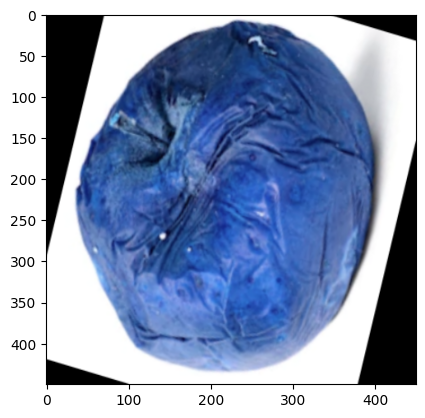

In [17]:
plt.imshow(x_test[200])

In [ ]:
print(y_test[200])

1


In [ ]:
x_test_shuffled = shuffle(x_test, random_state = 0)

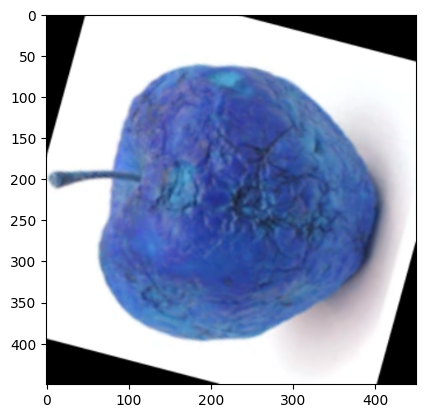

In [ ]:
plt.imshow(x_test_shuffled[1])

#model prediction to unseen test data

In [17]:
predictions = loaded_model.predict(x_test)

13/13 [==============================] - 7s 486ms/step


In [ ]:
print("Shape of predictions:", predictions.shape)
print("Sample predictions:", predictions[120:])

In [20]:
final_predictions = []
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    final_predictions.append(1)
  else:
    final_predictions.append(0)

In [21]:
print(predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
print("Shape of y_test:", y_test.shape)
print("Sample labels:", y_test[:400])  # Print the first 10 labels

Shape of y_test: (400,)
Sample labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Check unique labels
unique_labels = np.unique(y_test)
print("Unique labels:", unique_labels)
print("Number of unique labels:", len(unique_labels))

Unique labels: [0 1]
Number of unique labels: 2


#confusion matrix for the test result

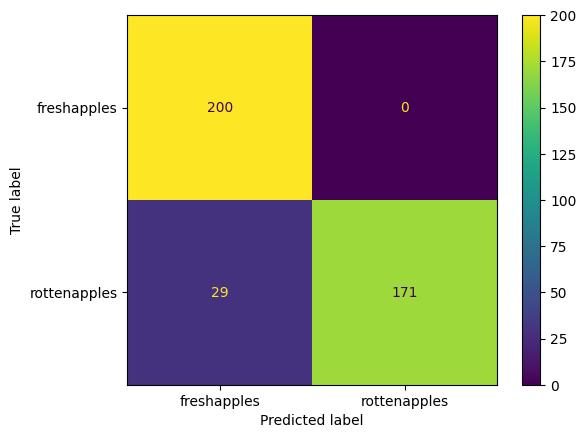

In [25]:
actual = y_test
predicted = final_predictions

confusion_matrix = metrics.confusion_matrix(actual, predicted)

ConfusionMatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["freshapples", "rottenapples"])

ConfusionMatrix_display.plot()
plt.show()